## Markowitz Portolio Optimization
- Returns of a portfolio can be increased without increasing risk of the portfolio by making a portfolio of relatively unrelated(low correlation) stocks

In [8]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import yfinance as yfin
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for asset in assets:
    pf_data[asset] = wb.get_data_yahoo(asset, start='2010-1-1')['Adj Close']
#     print(wb.DataReader(asset, data_source='yahoo', start='2010-1-1'))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,41.439640,1132.989990
2010-01-05,41.453209,1136.520020
2010-01-06,41.256584,1137.140015
2010-01-07,41.032848,1141.689941
2010-01-08,40.978607,1144.979980


In [17]:
pf_data.tail()

,PG,^GSPC
Date,,
2023-01-06,153.919998,3895.080078
2023-01-09,152.039993,3892.090088
2023-01-10,151.889999,3919.250000
2023-01-11,150.660004,3969.610107
2023-01-12,149.809998,3983.169922


In [18]:
pf_data.shape, pf_data.size

((3280, 2), 6560)

For comparision normalizing to 100

<AxesSubplot:xlabel='Date'>

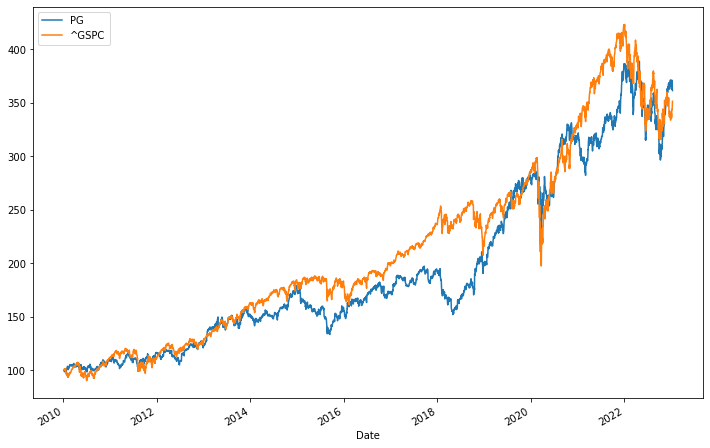

In [20]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(12, 8))

obtaining efficient frontier  

In [23]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [24]:
log_returns.mean()*250

PG       0.097982
^GSPC    0.095854
dtype: float64

In [25]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029990,0.017688
^GSPC,0.017688,0.031661


In [27]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.574026
^GSPC,0.574026,1.000000


Number of stocks in the portfolio

In [28]:
 num_assets = len(assets)

In [29]:
num_assets

2

Random weights of the assets in the potfolio

In [32]:
arr = np.random.random(num_assets)
arr

array([0.34940571, 0.08237142])

In [33]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.53415856, 0.46584144])

In [34]:
   weights[0] + weights[1]

1.0